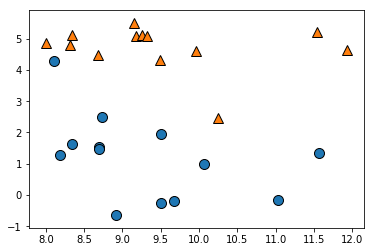

(26, 2)
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]
[ 9.96346605 11.0329545  11.54155807  8.69289001  8.1062269   8.30988863]
[ 4.59676542 -0.16816717  5.21116083  1.54322016  4.28695977  4.80623966]


In [14]:
import mglearn
import matplotlib.pyplot as plt

x,y=mglearn.datasets.make_forge()

mglearn.discrete_scatter( x[:,0],x[:,1],y )
plt.show()

print( x.shape )
print( y )
print( x[:6,0] )
print( x[:6,1] )

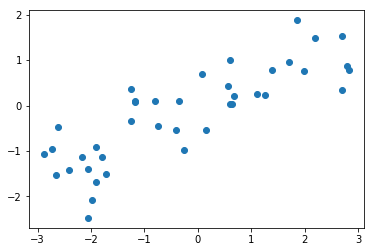

In [15]:
x,y=mglearn.datasets.make_wave( n_samples=40 )
plt.plot(x,y,'o')

In [27]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print( "cancer keys:\n{}".format( cancer.keys() ) )
print( cancer.data[:1,] )
print( cancer.data.shape )
print( cancer.target[:1,] )
print( cancer.target_names[:1,] )
print( cancer.DESCR[:100] )
print( cancer.feature_names[:1,] )


cancer keys:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]]
(569, 30)
[0]
['malignant']
Breast Cancer Wisconsin (Diagnostic) Database

Notes
-
['mean radius']


In [36]:
import numpy as np
print( "sample counts per class:\n{}".format( {n:v for n,v in zip(cancer.target_names,np.bincount(cancer.target)) } ) )

sample counts per class:
{'malignant': 212, 'benign': 357}


In [41]:
# p35
from sklearn.datasets import load_boston
boston=load_boston()
print( "keys:{}\n".format( boston.keys) )
print(boston.data.shape)

keys:<built-in method keys of Bunch object at 0x7f52e5a6e3b8>

(506, 13)


In [44]:
x,y=mglearn.datasets.load_extended_boston()
print("x_shape:{}".format(x.shape))
print("y_shape:{}\n".format(y.shape))

x_shape:(506, 104)
y_shape:(506,)



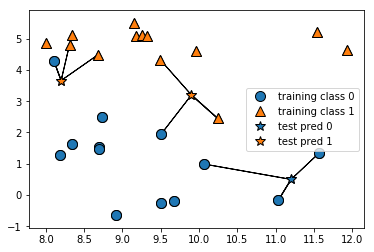

In [46]:
# 2.3.2      k-近傍法
mglearn.plots.plot_knn_classification( n_neighbors=1 )
mglearn.plots.plot_knn_classification( n_neighbors=3 )

In [67]:
# p38
from sklearn.model_selection import train_test_split
x,y=mglearn.datasets.make_forge()

print(x.shape)
print(y.shape)

#x_train,y_train,x_test,y_test=train_test_split(x,y,random_state=0)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)


from sklearn.neighbors import KNeighborsClassifier# クラスをインポート
clf=KNeighborsClassifier(n_neighbors=3)# インスタンスを生成
print(clf)
print()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# 訓練セットを使う
clf.fit(x_train,y_train)

print( "test set prefictions:{}".format( clf.predict(x_test) ) )

# 汎化性能を評価   score関数をテストデータとテストラベルで呼び出す
print( clf.score(x_test,y_test) )
print( clf.score(x_train,y_train) )



(26, 2)
(26,)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

(19, 2)
(19,)
(7, 2)
(7,)
test set prefictions:[1 0 1 0 1 0 0]
0.8571428571428571
0.9473684210526315


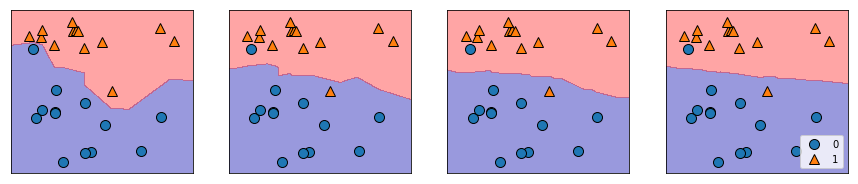

In [95]:
# 2.3.2.2   KNeighborsClassifierの解析

#fig=plt.figure()
#plt.add_subplot(111) この二行は以下と同じ
#fig,axes=plt.subplots(2,2)

fig,axes=plt.subplots( 1,4,figsize=(15,3) ) # figsize=( width,height)

for n_neighbors,ax in zip( [1,3,9,12],axes ):
    # fit関数は自分自身を返すので、一行でインスタンスを生成してfitすることができる
    clf=KNeighborsClassifier( n_neighbors=n_neighbors ).fit(x,y)
    mglearn.plots.plot_2d_separator( clf,x,fill=True,eps=0.5,ax=ax,alpha=0.4 )# 境界線を描画
    
    mglearn.discrete_scatter( x[:,0],x[:,1],y,ax=ax)# プロットする
    
axes[3].legend(loc=0)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


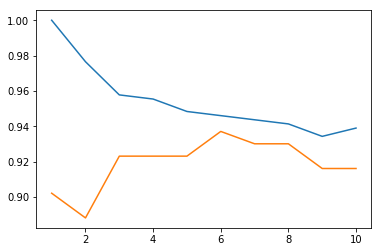

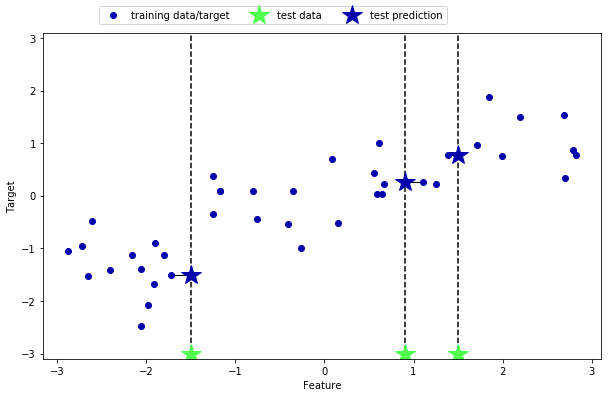

In [107]:
# p40
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
print(cancer.keys() )
#print(cancer.DESCR )
x_train,x_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)
# 引数は（特徴行列、目的変数、test_size=テスト用の割合、random_state=分割する際の乱数のシード値,
#                             stratify=data is split in a stratified fashion, using this as the class labels.）

training_accuracy=[]
test_accuracy=[]

# n_neighborsを１から10まで試す
neighbors_settings=range(1,11)# 出力するグラフのｘ軸に当たる

for n_neighbors in neighbors_settings:
    #モデルを構築
    clf=KNeighborsClassifier( n_neighbors=n_neighbors )
    clf.fit(x_train,y_train)
    
    # 訓練精度を記録
    training_accuracy.append(clf.score(x_train,y_train) )
    # 汎化精度を記録
    test_accuracy.append( clf.score(x_test,y_test) )

plt.plot( neighbors_settings,training_accuracy, )
plt.plot( neighbors_settings,test_accuracy, )

plt.show()

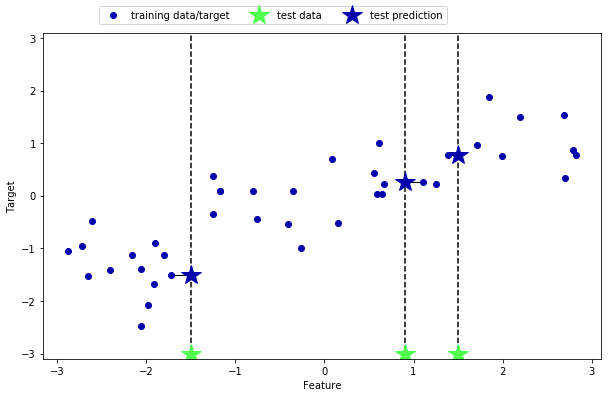

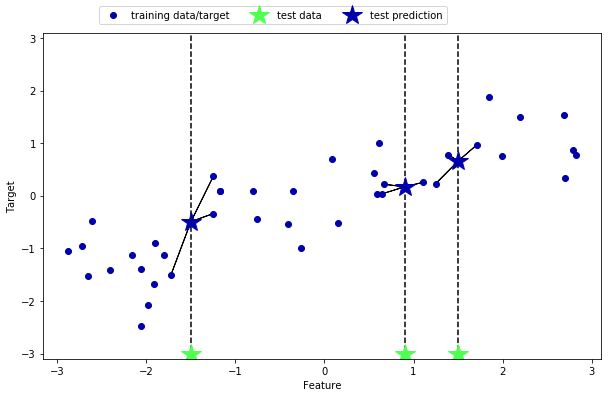

In [110]:
mglearn.plots.plot_knn_regression( n_neighbors=1 )
mglearn.plots.plot_knn_regression( n_neighbors=3 )

In [120]:
from sklearn.neighbors import KNeighborsRegressor
x,y=mglearn.datasets.make_wave(n_samples=20)
print(x)
print()
print(y)
print()
x_train,x_test,y_train,y_test=train_test_split( x,y,random_state=0 )
#print( x_train.shape() )

reg=KNeighborsRegressor( n_neighbors=3 )#モデルのインスタンスを生成
reg.fit( x_train,y_train )# モデルを学習させる

print( reg.predict( x_test ) )# predict()はクラスを予測する
print( reg.score(x_test,y_test) )


[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]
 [-2.87649303]
 [ 2.81945911]
 [ 1.99465584]
 [-1.72596534]
 [-1.9090502 ]
 [-1.89957294]
 [-1.17454654]
 [ 0.14853859]
 [-0.40832989]
 [-1.25262516]]

[-0.94788767  1.01720489 -0.08596376 -0.06075119 -0.75934374 -1.60501542
 -0.82945092  0.68336686  0.35889909  0.19933869 -1.5774682   1.11736466
  1.19312971 -1.29962216 -1.74356807 -0.5073919  -0.09407231 -0.17468205
 -0.29191552 -0.75878799]

[-0.40554735  0.99795374 -0.78052738 -0.01203152 -1.06460336]
0.8963895930942697


[[0.00207947 0.22       0.19794721 ... 0.96119883 0.45259981 0.21311573]
 [0.00108981 0.25       0.17118768 ... 1.         0.2066777  0.04271567]
 [0.00110566 0.4        0.2181085  ... 0.96179224 0.11690584 0.0142099 ]
 ...
 [0.00162594 0.         0.35007331 ... 0.98798327 0.23505388 0.05592233]
 [0.0025059  0.         0.23643695 ... 0.97913066 0.46608557 0.22186595]
 [0.00149286 0.         0.13159824 ... 1.         0.35761589 0.12788913]]


AttributeError: 'numpy.ndarray' object has no attribute 'plot'

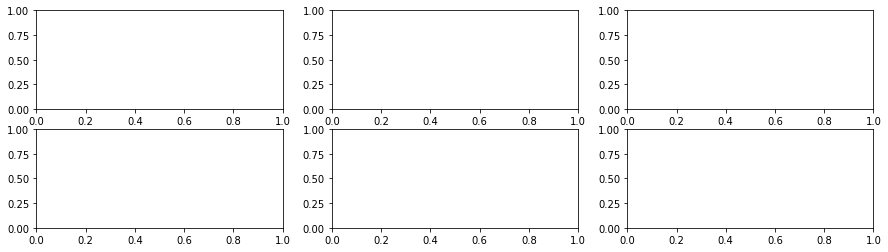

In [215]:
# 2.3.2.4 KNeighborsRegressorの解析
#import numpy as np
fig,axes=plt.subplots( 2,3,figsize=(15,4) )# subplots(width,height)
line=np.linspace( -3,3,1000 ).reshape(-1,1)
#print(line)
print(x_train)
#plt.plot(x_train,y_train)

#ax.plot( line,reg.predict(line) )
#ax.plot( x_train,y_train,'2',markersize=10 )
#ax.plot( x_test,y_test,'v',markersize=10 )

for n_neighbors,ax in zip( [1,3,9],axes ):
    reg=KNeighborsRegressor( n_neighbors=n_neighbors, )
    reg.fit( x_train,y_train )
    ax.plot( line,reg.predict(line) )
    ax.plot( x_train,y_train,'2',markersize=10 )
    ax.plot( x_test,y_test,'v',markersize=10 )
    

print( reg )


w[0]: 0.393906  b: -0.031804


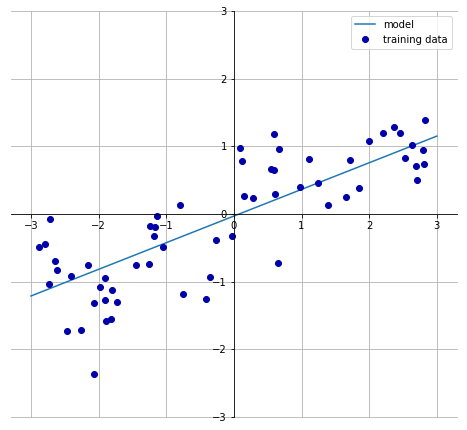

In [156]:
# 2.3.3   p46   線形モデル

mglearn.plots.plot_linear_regression_wave()

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

[-1.18073311  0.50015912  0.13772889  1.17396178 -1.32035898]
[[ 0.14853859]
 [ 0.60669007]
 [-2.65149833]
 [-2.26777059]
 [-2.06388816]]

[0.39390555]
-0.031804343026759746


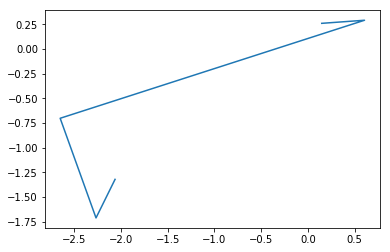

In [188]:
# 2.3.3.2
#scikit-learn には、線形回帰による予測を行うクラスとして、
#sklearn.linear_model.LinearRegression が用意されています。
import numpy as np
from sklearn.linear_model import LinearRegression
x,y=mglearn.datasets.make_wave( n_samples=60 )
print(x[:5])
print()
print(y[:5])

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
print(x_train[:5])
plt.plot( x_train[:5],y_train[:5] )
lr=LinearRegression().fit( x_train,y_train )
# fit()関数は、訓練セットから機械学習モデルを構築する
print()
print( lr.coef_ )# coef(coefficient:係数)つまり重みはcoef_属性に格納される
print( lr.intercept_ )# intercept_(切片:intercept)はintercept_属性に格納する


In [195]:
# 次に、より複雑なデータセットであるboston_housingデータセットを使うとどうなる？
x,y=mglearn.datasets.load_extended_boston()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
lr=LinearRegression().fit(x_train,y_train)
print(lr)
print( "{:.2f}".format(lr.score(x_train,y_train) ) )
print( "{:.2f}".format(lr.score(x_test,y_test) ) )


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
0.95
0.61


In [198]:
# 2.3.3.3 : リッジ回帰
# 線形モデルの回帰の一つ。予測に用いられる式は、通常最小二乗法と同じ。
'''リッジ回路では、係数（ｗ）を、訓練データに対する予測だけでなく、他の製薬に対しても最適化する。
ここでは'係数の絶対値の大きさを可能な限り小さくしたい。つまり、ｗ（重さ）の要素をなるべく0に近くしたいのだ。
直感的には、予測をうまく行いつつ個々の特徴量が出力に与える影響をなるべく小さくしたい（つまり傾きを小
さくしたい）。
この制約条件は正則化（regukarization）の一例（今回は’L2正則化’）。
正則化とは、過剰適合を防ぐために明示的にモデルを成約することである。'''

from sklearn.linear_model import Ridge
ridge=Ridge().fit(x_train,y_train)
print( ridge )
print( ridge.score(x_train,y_train) )
print( ridge.score(x_test,y_test) )



Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
0.8860578560395835
0.7527139600306949


In [1]:
ridge10=Ridge(alpha=10).fit(x_train,y_train)
fig=plt.subplots(1,2)

ax.plot( ridge.coef_,'s' )
plt.plot( ridge10.coef_,'^' )


NameError: name 'Ridge' is not defined

In [5]:
# 2.3.5  p57

from sklearn.svm import LinearSVC
import mglearn

x,y=mglearn.datasets.make_forge()

print(x,y)

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]] [1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]
